In [1]:
import pandas as pd
import lamindb as ln
import os
import bionty as bt

→ connected lamindb: jkobject/scprint2


In [ ]:
! pip install gsutil gcsfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.0 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached cryptography-43.0.3-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.1/178.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 98.0 MB/s eta 0:00:00
Using cached cryptography-43.0.3-cp39-abi3-manylinux_2_28_x86_64.wh

In [ ]:
species = ["Arabidopsis_thaliana",
"Bos_taurus",
"Caenorhabditis_elegans",
"Callithrix_jacchus",
"Danio_rerio",
"Drosophila_melanogaster",
"Equus_caballus",
"Gallus_gallus",
"Gorilla_gorilla",
"Heterocephalus_glaber",
"Homo_sapiens",
"Macaca_mulatta",
"Mus_musculus",
"Oryctolagus_cuniculus",
"Oryza_sativa",
"Ovis_aries",
"Pan_troglodytes",
"Schistosoma_mansoni",
"Solanum_lycopersicum",
"Sus_scrofa",
"Zea_mays"
]

In [5]:
! gsutil cp gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/$i/obs_metadata.parquet.gz .
df = pd.read_parquet('obs_metadata.parquet.gz')

Copying gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/Zea_mays/obs_metadata.parquet.gz...
- [1 files][  2.3 MiB/  2.3 MiB]                                                
Operation completed over 1 objects/2.3 MiB.                                      


In [6]:
mdf = pd.DataFrame()
for i in species:
    ! gsutil cp gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/$i/sample_metadata.parquet .
    df = pd.read_parquet('sample_metadata.parquet')
    print(i, len(df), df.obs_count.sum())
    mdf = pd.concat([mdf, df])

Copying gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/Arabidopsis_thaliana/sample_metadata.parquet...
- [1 files][ 15.0 KiB/ 15.0 KiB]                                                
Operation completed over 1 objects/15.0 KiB.                                     
Arabidopsis_thaliana 175 1584925
Copying gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/Bos_taurus/sample_metadata.parquet...
- [1 files][ 11.7 KiB/ 11.7 KiB]                                                
Operation completed over 1 objects/11.7 KiB.                                     
Bos_taurus 48 399693
Copying gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/Caenorhabditis_elegans/sample_metadata.parquet...
/ [1 files][ 11.3 KiB/ 11.3 KiB]                                                
Operation completed over 1 objects/11.3 KiB.                                     
Caenorhabditis_elegans 52 253521
Copying gs://arc-ctc-scbasecamp/2025-02-25/metadata/Velocyto/Callithrix_jacchus/sample_metadata.parquet..

In [ ]:
Arabidopsis_thaliana 175 1584925
Bos_taurus 48 399693
Caenorhabditis_elegans 52 253521
Callithrix_jacchus 24 143363
Danio_rerio 458 3307847
Drosophila_melanogaster 181 1589585
Gallus_gallus 102 635150
Heterocephalus_glaber 79 442523
Homo_sapiens 16057 112968089
Macaca_mulatta 587 3942632
Mus_musculus 12212 94559938
Oryctolagus_cuniculus 34 425813
Oryza_sativa 31 273619
Ovis_aries 20 178486
Pan_troglodytes 49 301065
Sus_scrofa 195 1693155
Zea_mays 33 345935

Schistosoma_mansoni 7 31341
Solanum_lycopersicum 10 93229
Gorilla_gorilla 2 8582
Equus_caballus 11 103852

In [7]:
todrop = [
    "Schistosoma mansoni",
    "Solanum lycopersicum",
    "Gorilla gorilla",
    "Equus caballus",
]
mdf = mdf[~mdf.organism.isin(todrop)]
mdf = mdf[mdf.czi_collection_name.isna()]
mdf = mdf[~mdf.tech_10x.isin(['cellplex', 'fixed_rna', 'flex', 'atac', 'not_applicable', 'other'])]

In [8]:
mdf.to_parquet('full_sample_metadata.parquet')

In [3]:
mdf = pd.read_parquet('full_sample_metadata.parquet')

In [9]:
mdf.tissue.value_counts().index

Index(['blood', 'brain', 'other', 'lung', 'bone marrow', 'skin of body',
       'liver', 'breast', 'lymph node', 'immune system', 'spleen', 'embryo',
       'eye', 'heart', 'pancreas', 'colon', 'skeletal system', 'vasculature',
       'small intestine', 'kidney', 'central nervous system', 'musculature',
       'respiratory system', 'adipose tissue', 'uterus', 'spinal cord',
       'esophagus', 'prostate gland', 'cortex', 'peripheral nervous system',
       'intestine', 'ovary', 'testis', 'stomach', 'sensory system',
       'endocrine gland', 'nose', 'urinary bladder', 'placenta', 'mucosa',
       'reproductive system', 'digestive system', 'large intestine',
       'lamina propria', 'exocrine gland', 'adrenal gland',
       'liver;bone marrow', 'hindlimb', 'head', 'forelimb', 'tongue',
       'esophagogastric junction', 'milk', 'omentum', 'fallopian tube',
       'pleura', 'scalp', 'abdomen', 'blood; other',
       'blood; skeletal system; skin of body', 'yolk sac', 'blood; liver',
    

In [10]:
mdf.disease.value_counts().index

Index(['unsure', 'not specified', 'none', 'other', 'normal', 'melanoma',
       'COVID-19', 'breast cancer', 'healthy', 'control',
       ...
       'related to hematopoiesis and thrombocytopenia',
       'refractory aplastic anemia, idiopathic thrombocytopenic purpura',
       'granular parakeratosis related to aluminum chloride exposure', 'flare',
       'systemic lupus erythematosus in remission',
       'systemic lupus erythematosus (SLE) - Remission state', 'before flare',
       'acute myeloid leukaemia (AML) or myelodysplastic syndrome (MDS)',
       'systemic lupus erythematosus (SLE) in remission',
       'Not specified; normal phenotype'],
      dtype='object', name='disease', length=5942)

In [20]:
len([i for i,j in mdf.disease.value_counts().items() if j > 2])

1150

In [4]:
import bionty as bt

In [5]:
mapp = {}
for t in tissues:
    mapp[t] = bt.Tissue.search(t).first().ontology_id

NameError: name 'tissues' is not defined

In [48]:
mapp = {}

In [6]:
for i, (t,j) in enumerate([(i,j) for i,j in mdf.disease.value_counts().items() if j > 2]):
    if t in ['unknown', 'not_applicable', 'other', 'not_specified', 'unsure', 'unspecified', 'unknown_disease', 'not specified', 'none', 'Not specified', "cardiovascular disease risk factors", "esophageal squamous-cell carcinoma", "Alzheimer's disease (model organism)", "not applicable"]:
        continue
    if t in ['healthy', 'control', 'healthy tissue', 'healthy tissue control', 'healthy tissue sample', 'healthy tissue sample control', "healthy donor", "healthy control", ]:
        mapp[t] = 'PATO:0000461'
        continue

    try:
        mapp[t] = bt.Disease.search(t, limit=2).first().ontology_id
    except:
        if j>10:
            print(t)
        continue
mapp

→ connected lamindb: jkobject/scprint2
pancreatic ductal adenocarcinoma (PDAC)
esophageal squamous-cell carcinoma (ESCC)
Trisomy 21 (Down's syndrome)
Hormone dependent breast cancer (HDBC)
neonatal SHIV infection
multiple myeloma, early relapse
neurological diseases
Multiple Myeloma, early relapse
Alzheimer's Disease (AD)
Acute HIV-1 infection
acute GVHD
lung adenocarcinoma (LUAD)
not explicitly mentioned
COVID-19 pneumonia
experimental autoimmune encephalomyelitis (EAE)
ME/CFS
stage IV melanoma
HIV-1 infection
hormone-dependent breast cancer
SHIV infection
advanced melanoma
non-alcoholic fatty liver disease (NAFLD)
normal (control samples)
fibrotic hypersensitivity pneumonitis
Chronic HIV
Idiopathic Pulmonary Fibrosis (IPF)
Fibrotic hypersensitivity pneumonitis
T3 sarcoma
hepatocellular carcinoma (HCC)
Alzheimer's disease model
hormone dependent breast cancer
control (healthy)
Experimental Autoimmune Encephalomyelitis (EAE)
related to cancer treatment
myocardial infarction and cardiac

{'normal': 'PATO:0000461',
 'melanoma': 'MONDO:0005105',
 'COVID-19': 'MONDO:0100096',
 'breast cancer': 'MONDO:0007254',
 'healthy': 'PATO:0000461',
 'control': 'PATO:0000461',
 'multiple myeloma': 'MONDO:0009693',
 'glioblastoma': 'MONDO:0018177',
 'lung adenocarcinoma': 'MONDO:0005061',
 'colorectal cancer': 'MONDO:0005575',
 'pancreatic cancer': 'MONDO:0009831',
 'prostate cancer': 'MONDO:0008315',
 'atherosclerosis': 'MONDO:0005311',
 "Alzheimer's Disease": 'MONDO:0004975',
 "Alzheimer's disease": 'MONDO:0004975',
 'myocardial infarction': 'MONDO:0005068',
 'cancer': 'MONDO:0004992',
 'pancreatic ductal adenocarcinoma': 'MONDO:0005184',
 "Crohn's disease": 'MONDO:0005011',
 'acute myeloid leukemia (AML)': 'MONDO:0018874',
 'multiple sclerosis': 'MONDO:0005301',
 'endometrial carcinoma': 'MONDO:0002447',
 'SARS-CoV-2 infection': 'MONDO:0100233',
 'healthy donor': 'PATO:0000461',
 'healthy control': 'PATO:0000461',
 'bladder cancer': 'MONDO:0001187',
 'osteoarthritis': 'MONDO:000517

In [ ]:
additional_disease_mapping = {
    "cardiovascular disease risk factors": "EFO:0005278",
    "esophageal squamous-cell carcinoma": "MONDO:0005580",
    "Alzheimer's disease (model organism)": ""
    "pancreatic ductal adenocarcinoma (PDAC)":
    "esophageal squamous-cell carcinoma (ESCC)":
    "Trisomy 21 (Down's syndrome)":
    "Hormone dependent breast cancer (HDBC)":
    "neonatal SHIV infection":
    "multiple myeloma, early relapse":
    "neurological diseases":
    "Multiple Myeloma, early relapse":
    "Alzheimer's Disease (AD)":
    "Acute HIV-1 infection":
    "acute GVHD":
    "lung adenocarcinoma (LUAD)":
    "COVID-19 pneumonia":
    "experimental autoimmune encephalomyelitis (EAE)":
    "ME/CFS":
    "stage IV melanoma":
    "HIV-1 infection":
    "hormone-dependent breast cancer":
    "SHIV infection":
    "advanced melanoma":
    "non-alcoholic fatty liver disease (NAFLD)":
    "normal (control samples)": "PATO:0000461":
    "fibrotic hypersensitivity pneumonitis":
    "Chronic HIV":
    "Idiopathic Pulmonary Fibrosis (IPF)":
    "Fibrotic hypersensitivity pneumonitis":
    "T3 sarcoma":
    "hepatocellular carcinoma (HCC)":
    "Alzheimer's disease model":
    "hormone dependent breast cancer":
    "control (healthy)": "PATO:0000461":
    "Experimental Autoimmune Encephalomyelitis (EAE)":
    "related to cancer treatment":
    "myocardial infarction and cardiac fibrosis":
    "glioblastoma (GBM)":
    "Multiple Myeloma, Early relapse":
    "locally advanced esophageal/gastroesophageal junction cancer":
    "Glioblastoma (GBM)":
    "metastatic breast and ovarian cancer":
    "high grade serous ovarian cancer":
    "cancer immunotherapy":
    "carcinoma non-small cell":
    "non-alcoholic steatohepatitis (NASH)":
    "polyp, familial adenomatous polyposis":
    "breast cancer metastasis":
    "neuroimmunological diseases and migraine":
    "relapsed-refractory multiple myeloma":
    "heart failure with preserved ejection fraction (HFpEF)":
    "SARS-CoV-2 booster immunizations":
    "prostate cancer (MYC oncogene activation)":
    "high-grade serous ovarian carcinoma":
    "disease stage IV":
    "ME/CFS (Myalgic Encephalomyelitis/Chronic Fatigue Syndrome)":
    "severe dengue"
    "neuroimmunological diseases, migraine"
    "adrenal medullary tumor"
    "respiratory viral infection"
    "Marek's disease"
    "HIV latency"
    "neuropsychiatric diseases"
    "preterm labor": "PATO"
    "Type 1 Diabetes (T1D)"
    "triple-negative breast cancer (TNBC)"
    "non-diseased": "PATO:"
    "no irAE (immune-related adverse events)"
    "Alzheimer's disease and related dementias"
    "Clonal Hematopoiesis, COVID-19"
    "advanced melanoma (Stage IV)"
    "spinal cord injury (SCI)"
    "C9-ALS"
    "acute myeloid leukemia (AML) with RARG fusions"
    "Traumatic Brain Injury (TBI)"
    "liver metastatic breast cancer"
    "Myalgic Encephalomyelitis/Chronic Fatigue Syndrome (ME/CFS)"
    "traumatic brain injury (TBI)"
    "Npm1c/Flt3ITD leukemia model"
    "dilated cardiomyopathy (end-stage)"

}

In [8]:
organisms = {
    "Arabidopsis thaliana": "NCBITaxon:3702",
    "Bos taurus": "NCBITaxon:9913",
    "Caenorhabditis elegans": "NCBITaxon:6239",
    "Callithrix jacchus": "NCBITaxon:9483",
    "Danio rerio": "NCBITaxon:7955",
    "Drosophila melanogaster": "NCBITaxon:7227",
    "Gallus gallus": "NCBITaxon:9031",
    "Heterocephalus glaber": "NCBITaxon:10181",
    "Homo sapiens": "NCBITaxon:9606",
    "Macaca mulatta": "NCBITaxon:9544",
    "Mus musculus": "NCBITaxon:10090",
    "Oryctolagus cuniculus": "NCBITaxon:9986",
    "Oryza sativa": "NCBITaxon:39947",
    "Ovis aries": "NCBITaxon:9940",
    "Pan troglodytes": "NCBITaxon:9598",
    "Sus scrofa": "NCBITaxon:9823",
    "Zea mays": "NCBITaxon:4577"
}

tissues = {'blood': 'UBERON:0000178',
 'brain': 'UBERON:0000955',
 'lung': 'UBERON:0002048',
 'bone marrow': 'UBERON:0002371',
 'skin of body': 'UBERON:0002097',
 'liver': 'UBERON:0002107',
 'breast': 'UBERON:0000310',
 'lymph node': 'UBERON:0000029',
 'immune system': 'UBERON:0002405',
 'spleen': 'UBERON:0002106',
 'embryo': 'UBERON:0000922',
 'eye': 'UBERON:0000970',
 'heart': 'UBERON:0000948',
 'pancreas': 'UBERON:0001264',
 'colon': 'UBERON:0001155',
 'skeletal system': 'UBERON:0001434',
 'vasculature': 'UBERON:0002049',
 'small intestine': 'UBERON:0002108',
 'kidney': 'UBERON:0002113',
 'central nervous system': 'UBERON:0001017',
 'musculature': 'UBERON:0001015',
 'respiratory system': 'UBERON:0001004',
 'adipose tissue': 'UBERON:0001013',
 'uterus': 'UBERON:0000995',
 'spinal cord': 'UBERON:0002240',
 'esophagus': 'UBERON:0001043',
 'prostate gland': 'UBERON:0002367',
 'cortex': 'UBERON:0001851',
 'peripheral nervous system': 'UBERON:0000010',
 'intestine': 'UBERON:0000160',
 'ovary': 'UBERON:0000992',
 'testis': 'UBERON:0000473',
 'stomach': 'UBERON:0000945',
 'sensory system': 'UBERON:0001032',
 'endocrine gland': 'UBERON:0002368',
 'urinary bladder': 'UBERON:0001255',
 'placenta': 'UBERON:0001987',
 'mucosa': 'UBERON:0000344',
 'reproductive system': 'UBERON:0000990',
 'digestive system': 'UBERON:0001007',
 'large intestine': 'UBERON:0000059',
 'lamina propria': 'UBERON:0000030',
 'exocrine gland': 'UBERON:0002365',
 'adrenal gland': 'UBERON:0002369',
 'hindlimb': 'UBERON:0002103',
 'forelimb': 'UBERON:0002102',
 'tongue': 'UBERON:0001723',
 'esophagogastric junction': 'UBERON:0007650',
 'milk': 'UBERON:0001913',
 'omentum': 'UBERON:0003688',
 'fallopian tube': 'UBERON:0003889',
 'pleura': 'UBERON:0000977',
 'scalp': 'UBERON:0000403',
 'abdomen': 'UBERON:0000916',
 'yolk sac': 'UBERON:0001040',
 'chest wall': 'UBERON:0016435',
 'pleural fluid': 'UBERON:0001087',
 'ureter': 'UBERON:0000056',
 'gallbladder': 'UBERON:0002110'}
# else "unknown"

In [13]:
mdf['tissue_ontology_term_id'] = mdf.tissue.map(tissues, na_action='ignore')
mdf.loc[mdf.tissue_ontology_term_id.isna(), 'tissue_ontology_term_id'] = "unknown"
mdf.tissue_ontology_term_id.value_counts()

tissue_ontology_term_id
UBERON:0000178    3993
UBERON:0000955    3698
unknown           2904
UBERON:0002048    1634
UBERON:0002371    1329
UBERON:0002097    1070
UBERON:0002107     927
UBERON:0000310     750
UBERON:0000029     734
UBERON:0002405     729
UBERON:0002106     674
UBERON:0000922     644
UBERON:0000970     630
UBERON:0000948     605
UBERON:0001264     593
UBERON:0001155     525
UBERON:0001434     461
UBERON:0002049     438
UBERON:0002108     433
UBERON:0002113     401
UBERON:0001017     357
UBERON:0001015     302
UBERON:0001004     299
UBERON:0001013     268
UBERON:0000995     243
UBERON:0002240     235
UBERON:0001043     210
UBERON:0002367     204
UBERON:0001851     199
UBERON:0000010     174
UBERON:0000160     161
UBERON:0000992     138
UBERON:0000473     121
UBERON:0000945     118
UBERON:0001032     116
UBERON:0002368     115
UBERON:0001255      93
UBERON:0001987      92
UBERON:0000344      83
UBERON:0000990      76
UBERON:0001007      61
UBERON:0000059      59
UBERON:000

In [18]:
mdf['organism_ontology_term_id'] = mdf.organism.map(organisms, na_action='ignore')
mdf.organism_ontology_term_id.value_counts(), mdf.organism_ontology_term_id.isna().sum()

(organism_ontology_term_id
 NCBITaxon:9606     13530
 NCBITaxon:10090    11676
 NCBITaxon:9544       573
 NCBITaxon:7955       457
 NCBITaxon:9823       195
 NCBITaxon:7227       181
 NCBITaxon:3702       175
 NCBITaxon:9031       102
 NCBITaxon:10181       79
 NCBITaxon:6239        52
 NCBITaxon:9913        48
 NCBITaxon:9598        47
 NCBITaxon:9986        34
 NCBITaxon:4577        33
 NCBITaxon:39947       31
 NCBITaxon:9483        21
 NCBITaxon:9940        20
 Name: count, dtype: int64,
 0)

In [19]:
mdf['disease_ontology_term_id'] = mdf.disease.map(mapp, na_action='ignore')
mdf.loc[mdf.disease_ontology_term_id.isna(), 'disease_ontology_term_id'] = "unknown"
mdf.disease_ontology_term_id.value_counts()

disease_ontology_term_id
unknown          19622
PATO:0000461       994
MONDO:0005105      255
MONDO:0100096      233
MONDO:0004975      209
                 ...  
MONDO:0011584        3
MONDO:0005109        3
MONDO:0018908        3
MONDO:0013680        3
MONDO:0017884        3
Name: count, Length: 366, dtype: int64

In [27]:
[(n,i) for n, i in mdf['cell_line'].value_counts().items() if i > 10]

[('unsure', 4024),
 ('not specified', 2214),
 ('not applicable', 1295),
 ('not_applicable', 1018),
 ('other', 966),
 ('none', 744),
 ('PBMC', 273),
 ('CD45+ cells', 136),
 ('PBMCs', 126),
 ('live CD45+ immune cells', 96),
 ('PBMC (Peripheral Blood Mononuclear Cells)', 92),
 ('MCF7', 86),
 ('Not applicable', 80),
 ('various cell types', 77),
 ('C57BL/6', 74),
 ('Not specified', 72),
 ('T cells', 69),
 ('C57BL/6J', 68),
 ('H9', 66),
 ('CD45+ immune cells', 65),
 ('primary cells', 63),
 ('T-cells', 57),
 ('Live CD45+ immune cells', 56),
 ('Snap25-IRES2-Cre/wt; Ai14(RCL-tdT)/wt', 56),
 ('B cell', 54),
 ('MC38', 52),
 ('plasmablast', 50),
 ('CD4+ T cells', 48),
 ('B cells', 47),
 ('immune cells', 42),
 ('myeloid cells', 42),
 ('microglia', 41),
 ('various', 40),
 ('CD8 T cells', 39),
 ('T cell', 39),
 ('human T cells', 38),
 ('EYFP+ T cells', 37),
 ('mononuclear cell', 36),
 ('memory B cell', 36),
 ('peripheral blood mononuclear cells (PBMC)', 33),
 ('MDAMB231', 32),
 ('leukocytes', 31),
 (

In [29]:
mdf['tech_10x'].value_counts()

tech_10x
3_prime_gex          20714
5_prime_gex           4976
multiome               740
vdj                    514
feature_barcoding      310
Name: count, dtype: int64

In [38]:
parentdf = (
    bt.CellType.filter()
    .df(include=["parents__ontology_id"])
    .set_index("ontology_id")
)

In [39]:
parentdf

,uid,name,parents__ontology_id
ontology_id,,,
CL:0000000,4bKGljt0,cell,{None}
CL:0000001,2k3xeGbT,primary cultured cell,{CL:0000010}
CL:0000002,2GqGKpwD,obsolete immortal cell line cell,{None}
CL:0000003,1AtefLrT,obsolete native cell,{None}
CL:0000004,3suE4Wg6,obsolete cell by organism,{None}
...,...,...,...
CL:4042008,6OXayYqP,fibrous astrocyte,"{CL:0000029, CL:2000029, CL:0000127}"
CL:4042009,n7ezKRlq,interlaminar astrocyte,"{CL:0000029, CL:0002605, CL:0010012}"
CL:4042010,3afgdSa3,pial interlaminar astrocyte,{CL:4042009}


In [37]:
parentdf.loc['EFO:0010183']

uid                                             5q5okCXl
name                    single cell library construction
parents__ontology_id                              {None}
Name: EFO:0010183, dtype: object

In [ ]:
get_ancestry_mapping(cats, parentdf)

In [31]:
assay = {
    "3_prime_gex": "EFO:0030003",
    "5_prime_gex": "EFO:0030004",
    "multiome": "EFO:0030059",
    "vdj": "EFO:0010713",
    "feature_barcoding": "EFO:0030010"
}
mdf['assay_ontology_term_id'] = mdf.tech_10x.map(assay, na_action='ignore')

In [40]:
mdf#.organism.value_counts()

,entrez_id,srx_accession,feature_type,file_path,obs_count,lib_prep,tech_10x,cell_prep,organism,tissue,disease,perturbation,cell_line,czi_collection_id,czi_collection_name,tissue_ontology_term_id,organism_ontology_term_id,disease_ontology_term_id,assay_ontology_term_id
0,26626957,SRX19366046,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,7336,10x_Genomics,3_prime_gex,single_cell,Arabidopsis thaliana,other,not applicable,mock treatment (roots treated with liquid half...,not applicable,None,None,unknown,NCBITaxon:3702,unknown,EFO:0030003
1,26873636,SRX19580437,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,1601,10x_Genomics,multiome,single_cell,Arabidopsis thaliana,other,pathogen interaction with Pseudomonas syringae,treatment with AvrRpt2 for 24 hours,not applicable,None,None,unknown,NCBITaxon:3702,unknown,EFO:0030059
2,26626958,SRX19366047,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,7351,10x_Genomics,3_prime_gex,single_cell,Arabidopsis thaliana,other,none,mock treatment; 2 µM RALF1 peptide for 2 hours,none,None,None,unknown,NCBITaxon:3702,unknown,EFO:0030003
3,26779684,SRX19498718,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,14793,10x_Genomics,3_prime_gex,single_nucleus,Arabidopsis thaliana,other,unsure,unsure,not_applicable,None,None,unknown,NCBITaxon:3702,unknown,EFO:0030003
4,26873634,SRX19580435,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,2805,10x_Genomics,multiome,single_nucleus,Arabidopsis thaliana,other,Pseudomonas syringae,AvrRpt2 (9h),Col-0,None,None,unknown,NCBITaxon:3702,unknown,EFO:0030059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,26222706,SRX19052019,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,11628,10x_Genomics,3_prime_gex,single_cell,Zea mays,other,not specified,not specified,not applicable,None,None,unknown,NCBITaxon:4577,unknown,EFO:0030003
29,26222705,SRX19052018,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,9708,10x_Genomics,3_prime_gex,single_cell,Zea mays,other,not applicable,unsure,not applicable,None,None,unknown,NCBITaxon:4577,unknown,EFO:0030003
30,11416957,SRX8781690,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,9390,10x_Genomics,3_prime_gex,single_cell,Zea mays,embryo,unsure,unsure,unsure,None,None,UBERON:0000922,NCBITaxon:4577,unknown,EFO:0030003
31,11032409,SRX8487983,Velocyto,gs://arc-ctc-scbasecamp/2025-02-25/h5ad/Velocy...,8906,10x_Genomics,3_prime_gex,single_cell,Zea mays,other,none,none,single cells (protoplasts),None,None,unknown,NCBITaxon:4577,unknown,EFO:0030003


In [ ]:
mdf.to_parquet("data/tahoe_final_metadata.parquet")

In [6]:
mdf.obs_count.sum()

203264328

In [3]:
mdf = pd.read_parquet("data/tahoe_final_metadata.parquet")

In [53]:
arts = []
for i in mdf.index:
    arts.append(ln.Artifact(data=mdf.iloc[i]['file_path'], kind="dataset",description="from scbasecamp").save())

! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run
! no run & transform got linked, call `ln.track()` & re-run


KeyboardInterrupt: 

In [3]:
ln.Artifact.filter(description__contains="scbase").first().cache()

... synchronizing SRX19366046.h5ad: 100.0%
! run input wasn't tracked, call `ln.track()` and re-run


PosixUPath('/pasteur/appa/scratch/jkalfon/.cache/lamindb/arc-ctc-scbasecamp/2025-02-25/h5ad/Velocyto/Arabidopsis_thaliana/SRX19366046.h5ad')

In [4]:
ln.Artifact.filter(description__contains="scbase").first().open()

! run input wasn't tracked, call `ln.track()` and re-run


AnnDataAccessor object with n_obs × n_vars = 7336 × 31109
  constructed for the AnnData object SRX19366046.h5ad
    layers: ['ambiguous', 'spliced', 'unspliced']
    obs: ['SRX_accession', '_index', 'gene_count', 'umi_count']
    var: ['_index', 'feature_types', 'gene_ids']

In [5]:
adata = _

In [9]:
adata = adata.to_memory()

In [ ]:
arts = ln.Artifact.filter(key__contains="Velocyto/")
ln.Collection(arts, key="scbasecamp-raw", description="gcp storage of scbasecamp with pre-selection of species").save()

# add the gene names to bionty for each species

In [22]:
for i in os.listdir('../data/gene_names')[:1]:
    print(i)

pan_names.parquet


In [8]:
df = pd.read_parquet('../data/gene_names/gallus_names.parquet')#'+i)

In [7]:
adata = ln.Artifact.filter(key__contains="Velocyto/Gallus_gallus").first().load()

! run input wasn't tracked, call `ln.track()` and re-run


In [29]:
adata[:, ~adata.var.gene_ids.isin(df.index)].X.sum()

650530.0

In [ ]:
for i in set(bt.Organism.using("laminlabs/arc-virtual-cell-atlas").df().ontology_id) - set(bt.Organism.filter().df().ontology_id):
    print(i)
    rec = bt.Organism.using("laminlabs/arc-virtual-cell-atlas").filter(ontology_id=i).first()
    rec.save()

In [ ]:
for i in set(bt.Organism.using("laminlabs/arc-virtual-cell-atlas").df().ontology_id)-set(['NCBITaxon:10090', 'NCBITaxon:9606']):
    print(i)
    df = bt.Gene.using("laminlabs/arc-virtual-cell-atlas").filter(organism__ontology_id=i).all().df()
    genes = []
    org = bt.Organism.filter(ontology_id=i).one()
    for row in df.to_dict(orient="records"):
        row['organism_id'] = org.id
        gene = bt.Gene(ensembl_gene_id=row['ensembl_gene_id'], stable_id=row['stable_id'], description=row['description'], symbol=row['symbol'], biotype=row['biotype'], organism=org, _skip_validation=True)
        genes.append(gene)
    ln.save(genes)

NCBITaxon:9940
NCBITaxon:9913
NCBITaxon:7955
NCBITaxon:7227
NCBITaxon:3702


In [10]:

import bionty as bt

In [15]:
df = bt.Gene.filter(organism_id=bt.Organism.filter(ontology_id="NCBITaxon:3702").first().id).df()

In [16]:
df

,uid,symbol,stable_id,ensembl_gene_id,ncbi_gene_ids,biotype,synonyms,description,space_id,source_id,organism_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,
655317,4nk3IEUupgU3,AT1G30814,AT1G30814,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:14.013000+00:00,1,None,1
655318,1CZkHr7qHHoH,AT1G51440,AT1G51440,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:14.013000+00:00,1,None,1
655319,9vvXG1urYeBU,AT1G51320,AT1G51320,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:14.013000+00:00,1,None,1
655320,2uwwkGEIqvGj,ATUBC2-1,AT1G45050,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:14.013000+00:00,1,None,1
655321,10xCEyaUATYT,AT1G77230,AT1G77230,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:14.013000+00:00,1,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686421,2JvKEoxSW7kA,psbE,ATCG00580,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:21.262000+00:00,1,None,1
686422,2XRvzB3LP9HI,rps4,ATCG00380,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:21.262000+00:00,1,None,1
686423,38abB0qy6FWT,nan,ATCG00905,None,None,protein_coding,None,None,1,None,285,None,2025-04-04 15:55:21.262000+00:00,1,None,1


In [4]:
df.loc[df.ensembl_gene_id.isna(), 'ensembl_gene_id']# = df.loc[df.ensembl_gene_id.isna(), 'stable_id']

id
248555    None
248556    None
248557    None
248558    None
248559    None
          ... 
686421    None
686422    None
686423    None
686424    None
686425    None
Name: ensembl_gene_id, Length: 185213, dtype: object

In [ ]:
from scdataloader import Preprocessor
from scdataloader.preprocess import additional_postprocess, LaminPreprocessor
import pandas as pd
import lamindb as ln
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
mdf = pd.read_parquet("data/tahoe_final_metadata.parquet")
mdf = mdf.set_index("srx_accession")

In [ ]:
col = ln.Collection.filter(key__contains="scbasecamp").first()

In [26]:
def preprocess(adata):
    elem = mdf.loc[adata.obs["SRX_accession"].iloc[0]]
    adata.obs["organism_ontology_term_id"] = elem.organism_ontology_term_id
    adata.obs["tissue_ontology_term_id"] = elem.tissue_ontology_term_id
    adata.obs["disease_ontology_term_id"] = elem.disease_ontology_term_id
    adata.obs["assay_ontology_term_id"] = elem.assay_ontology_term_id
    adata.obs["cell_type"] = "unknown"
    adata.obs["cell_type_ontology_term_id"] = "unknown"
    adata.obs["sex"] = "unknown"
    adata.obs["sex_ontology_term_id"] = "unknown"
    adata.obs["age"] = "unknown"
    adata.obs["development_stage_ontology_term_id"] = "unknown"
    adata.obs["self_reported_ethnicity_ontology_term_id"] = "unknown"
    adata.obs["ethnicity"] = "unknown"
    adata.obs["is_primary_data"] = True
    adata.obs["cell_culture"] = True
    if "gene_ids" in adata.var.columns:
        adata.var.symbol = adata.var.index
        adata.var["ensembl_ontology_term_id"] = adata.var["gene_ids"]
        adata.var = adata.var.set_index("gene_ids")
    return adata

preprocessor = Preprocessor(
    is_symbol=False,
    keepdata=True,
    organisms=list(set(mdf.organism_ontology_term_id.unique())),
    additional_preprocess=preprocess,
    additional_postprocess=additional_postprocess,
)

In [44]:
adata = col.artifacts.filter()[1000].load()
adata

! run input wasn't tracked, call `ln.track()` and re-run


AnnData object with n_obs × n_vars = 6352 × 28951
    obs: 'gene_count', 'umi_count', 'SRX_accession'
    var: 'gene_ids', 'feature_types'
    layers: 'ambiguous', 'spliced', 'unspliced'

/local/scratch/tmp/ipykernel_309718/2360757911.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  adata.var.symbol = adata.var.index
/pasteur/appa/homes/jkalfon/scDataLoader/scdataloader/preprocess.py:198: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


checking raw counts
removed 0 non primary cells, 6352 renamining
filtered out 35 cells, 6317 renamining
Removed 0 genes not known to the ontology
Removed 0 duplicate genes
Added 0 genes in the ontology but not present in the dataset
validating
starting QC


/pasteur/appa/homes/jkalfon/scDataLoader/scdataloader/preprocess.py:279: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


Seeing 390 outliers (6.17% of total dataset):
normalize
starting PCA
starting post processing


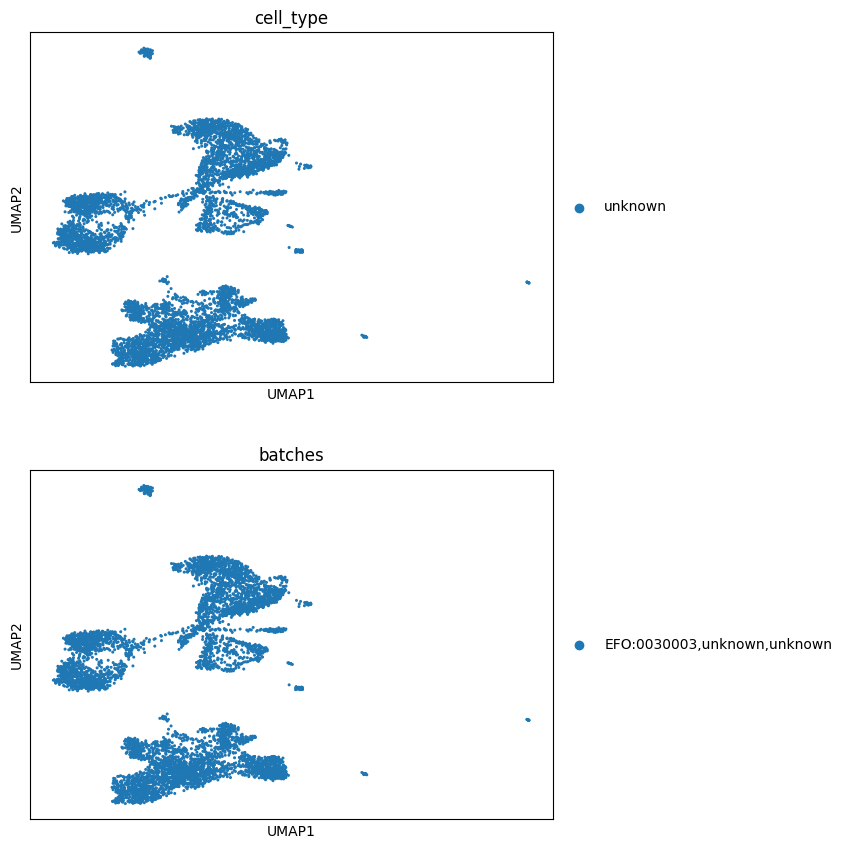

organism not supported for age labels


/pasteur/appa/homes/jkalfon/scDataLoader/scdataloader/preprocess.py:386: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 6317 × 28951
    obs: 'gene_count', 'umi_count', 'SRX_accession', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'sex', 'sex_ontology_term_id', 'age', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'ethnicity', 'is_primary_data', 'cell_culture', 'nnz', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'batches', 'leiden_2', 'leiden_1', 'leiden_0.5', 'clust_cell_type'
    var: 'feature_types', 'ensembl_ontology_term_id', 'uid', 'symbol', 'ncbi_gene_ids', 'biotype', 'synonyms', 'description', 'organism_id', 'mt', 'ribo', '

In [45]:
res_adata = preprocessor(adata.copy())

In [ ]:
preprocessor(
    col,
    name= "preprocessed dataset",
    description= "scbasecamp preprocessed dataset",
    start_at = 0,
    version ="2"
)